# [종로구 아파트 매매시기 분석을 위한 수집 데이터 명세]

* 수집 데이터 : 매매가, 전세가, 주변 생활시설 현황, 아파트 매매 건수 
* 매매가 & 전세가 : 실거래가 상승률, 전세보증금, 전세가율 분석
* 주변 생활시설 현황 : 해당 지역의 교통 편의성, 교육 시설 등 주변 시설 상태
* 아파트 매매 건수 : 거래량, 부동산 소비 심리

## [#1 : 아파트매매 실거래가]

### 1-1.   데이터 정의

아파트매매 실거래가 데이터는 2022년 01월 부터 2023년 4월 까지의 데이터로, 날짜 값을 인덱스로 한 [법정동, 지번, 아파트, 층, 전용면적, 거래금액, 건축년도]  7개의 columns 으로 구성되어 있으며, '거래금액'은 정수값으로 이루어졌습니다.


![](image/2023-05-03-21-30-35.png)

### 1-2. 수집 방법





* 공공데이터포털 국토교통부 XML 형식 API 활용
* requests 와 BeautifulSoup 라이브러리를 사용
* API 필수 파라미터 : serviceKey=인증키, LAWD_CD=종로구 지역코드, DEAL_YMD=convert_ym 함수 사용 
* url get 요청 -> bs4 'xml' 형식으로 해석 -> 'item'태그 find_all 
* for문을 사용하여, item 변수에 있는 모든 태그를 빈리스트에 담고, 최종결과 리스트에 다시한번 append 했습니다.
* 최종결과 리스트를 pandas의 DataFrame으로 변환하고 그것을 csv로 저장하였습니다.

### 1-3.   수집 경로

- URL : (http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?serviceKey=7mkGMKGrekfzGML%2BxtopFp2eF74oBX2srjwpQCIUe9Ww0nRMGYLhqSW%2BKua6Nwv0TtcLPnUA7QlrGF5HArmIQQ%3D%3D&LAWD_CD=11110&DEAL_YMD=202201)

- 실제 수집한 데이터는 YMD의 파라미터 값을 함수를 사용하여 2022년 01월 ~ 2023년 04월까지의 데이터를 가져왔습니다.  

### 1-4.   데이터의 논리적 구조

* 날짜 : 연,월,일 데이터를 yyyy-mm-dd형식으로 이어준 str 객체입니다.
* 법정동, 지번 : 해당 데이터의 법적인 주소지를 나타내는 str 객체입니다. 
* 아파트, 층, 전용면적, 건축년도 : 아파트명, 층수, 면적, 건축년도를 나타낸 str 객체입니다.
* 거래금액 : 해당 아파트가 거래된 금액을 나타내는 정수 값입니다.

### 1-5.   데이터의 물리적 저장 구조

데이터프레임을 csv로 저장함.


![](image/2023-05-03-23-44-24.png)
![](image/2023-05-03-23-45-49.png)

## [데이터#2 : 아파트 전세가]

### 2-1.   데이터 정의

아파트 전세가 데이터는 2022년 01월 부터 2023년 4월 까지의 데이터로, 날짜 값을 인덱스로 한 [법정동, 지번, 아파트, 층, 전용면적, 보증금액, 건축년도]  7개의 columns 으로 구성되어 있으며, '보증금액'은 정수값으로 이루어졌습니다.

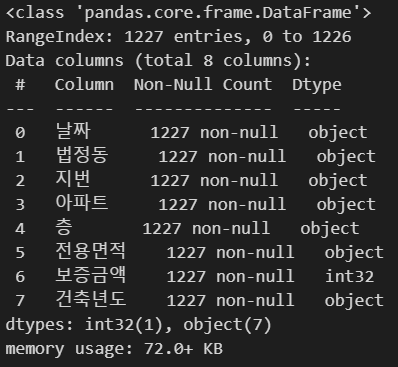

### 2-2. 수집 방법

* 공공데이터포털 국토교통부 XML 형식 API 활용
* requests 와 BeautifulSoup 라이브러리를 사용
* API 필수 파라미터 : serviceKey=인증키, LAWD_CD=종로구 지역코드, DEAL_YMD=convert_ym 함수 사용 
* url get 요청 -> bs4 'xml' 형식으로 해석 -> 'item'태그 find_all 
* for문을 사용하여, item 변수에 있는 모든 태그를 빈리스트에 담고, 최종결과 리스트에 다시한번 append 했습니다.
* 최종결과 리스트를 pandas의 DataFrame으로 변환하고 그것을 csv로 저장하였습니다.

### 2-3.   수집 경로

- URL : 
(http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?serviceKey=7mkGMKGrekfzGML%2BxtopFp2eF74oBX2srjwpQCIUe9Ww0nRMGYLhqSW%2BKua6Nwv0TtcLPnUA7QlrGF5HArmIQQ%3D%3D&LAWD_CD=11110&DEAL_YMD=202201)

- 실제 수집한 데이터는 YMD의 파라미터 값을 함수를 사용하여 2022년 01월 ~ 2023년 04월까지의 데이터를 가져왔습니다. 

### 2-4.   데이터의 논리적 구조

* 날짜 : 연,월,일 데이터를 yyyy-mm-dd형식으로 이어준 str 객체입니다.
* 법정동, 지번 : 해당 데이터의 법적인 주소지를 나타내는 str 객체입니다. 
* 아파트, 층, 전용면적, 건축년도 : 아파트명, 층수, 면적, 건축년도 아파트 정보를 나타낸 str 객체입니다.
* 보증금액 : 월세 데이터가 0인 보증금액으로, 전세값으로 이뤄진 정수 값입니다.

### 2-5.   데이터의 물리적 저장 구조

데이터프레임을 csv로 저장함.


![](image/2023-05-03-23-47-27.png)
![](image/2023-05-03-23-46-45.png)

## [데이터#3 : 지역별 생활업종 현황]

### 3-1.   데이터 정의

지역별 생활업종 현황은 업종 및 지역별(시도, 시군구)로 구분하여, 전월, 당월, 전년동월로 생활업종의 현황을 비교하는 데이터입니다

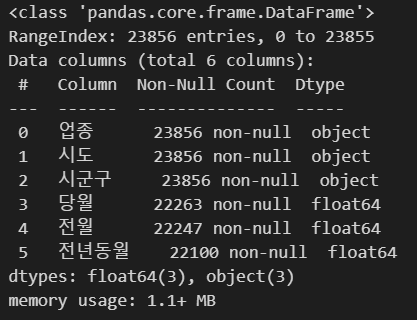

### 3-2. 수집 방법

* 공공데이터포털 국세청 csv 형식의 파일 다운로드
* 기존 CSV 파일(encoding="euc-kr") -> 데이터프레임 -> CSV 저장 (encoding="UTF-8")

### 3-3.   수집 경로

CSV 국세청_사업자현황_100대 생활업종 파일데이터 다운로드
https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15061118

### 3-4.   데이터의 논리적 구조

* 업종 :  생활업종을 구분하는 str 객체입니다.
* 시도, 시군구 : 해당 데이터의 법적인 주소지를 나타내는 str 객체입니다. 
* 당월, 전월, 전년동월 : 시간의 흐름에 따라 업종의 현황을 나타내는 float 객체입니다.

### 3-5.   데이터의 물리적 저장 구조

![](image/2023-05-03-23-00-47.png)
![](image/2023-05-03-23-01-42.png)

## [데이터#4 : 부동산 매매 거래건수]

### 4-1.   데이터 정의

부동산 매매 거래건수 데이터는 2022년 01월 부터 2023년 4월 까지의 데이터를 조회하여, 해당 시기에 거래된 매매량으로 구성되어 있습니다.

\\![](image/2023-05-03-23-12-07.png)


### 4-2. 수집 방법

* 공공데이터포털 한국부동산원 json 형식 API 활용
* API 필수 파라미터 : serviceKey=인증키, LAWD_CD=종로구 지역코드, lte=202304(끝일자), gte=202201(시작일자) 
* requests.get한 URL을 json으로 변환
* for문을 사용하여, data(key)에 있는 element("RESEARCH_DATE", "ALL_CNT")를 찾아 최종결과 리스트에 append 했습니다.
* 최종결과 리스트를 pandas의 DataFrame으로 변환하고 그것을 csv로 저장하였습니다.

### 4-3.   수집 경로

http://api.odcloud.kr/api/RealEstateTradingSvc/v1/getRealEstateTradingCount?page=1&perPage=1000000&returnType=json&cond%5BRESEARCH_DATE%3A%3ALTE%5D=202305&cond%5BRESEARCH_DATE%3A%3AGTE%5D=202201&cond%5BREGION_CD%3A%3AEQ%5D=11110&cond%5BDEAL_OBJ%3A%3AEQ%5D=07&serviceKey=7mkGMKGrekfzGML%2BxtopFp2eF74oBX2srjwpQCIUe9Ww0nRMGYLhqSW%2BKua6Nwv0TtcLPnUA7QlrGF5HArmIQQ%3D%3D

### 4-4.   데이터의 논리적 구조

* RESEARCH_DATE : 연,월,일 데이터를 yyyy-mm-dd형식으로 이어준 str 객체입니다.
* ALL_CNT: 해당 시기에 거래된 아파트 매매량에 대한 정수 값 입니다. 

### 4-5.   데이터의 물리적 저장 구조

![](image/2023-05-03-23-14-05.png)
![](image/2023-05-03-23-14-26.png)